<a href="https://colab.research.google.com/github/dmnk1308/DubAir/blob/main/Data_Set_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Data Set Introduction

This simple introduction to the Airbnb data set(s) will give you a short overview over the available data. The city used for this introduction is Berlin, hence if you want to run the exact same notebook for a different city you would need to change a few minor details. Otherwise, if you have downloaded all necessary data sets and run this notebook in the same directory it should run smoothly.

### Index
1. Load data set
2. Price analysis
    * (Inspect reviews)
3. Main file (listings.csv.gz)
4. "Analyze" Images
5. "Analyze" Reviews
6. Calendar file
7.  neighbourhoods Geo.json file

In [1]:
import os
import pandas as pd
import numpy as np
import gzip
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import matplotlib.image as mpimg


import seaborn as sns

np.set_printoptions(threshold=sys.maxsize)
from load_data import *

from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from helpers import *
import ast
import requests
from bs4 import BeautifulSoup as bs
import statsmodels.api as sm
from scipy.stats import halfnorm

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform


# 1. Load the Data

All availabe data sets are listed on: http://insideairbnb.com/get-the-data.html

For all cities there are 7 files:\
listings.csv \
reviews.csv \
listings.csv.gz \
reviews.csv.gz \
 \
calendar.csv.gz \
neighbourhoods.geojson \
neighbourhoods.csv 

In [2]:
url_listing = "http://data.insideairbnb.com/ireland/leinster/dublin/2021-11-07/data/listings.csv.gz"
url_reviews = "http://data.insideairbnb.com/ireland/leinster/dublin/2021-11-07/data/reviews.csv.gz"
listings = pd.read_csv(url_listing)
reviews = pd.read_csv(url_reviews)

In [3]:
print(list(listings.columns))

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 

In [4]:
pd.set_option('display.max_columns', 500)

In [5]:
print(np.unique(listings["bathrooms_text"].astype(str)))

['0 baths' '0 shared baths' '1 bath' '1 private bath' '1 shared bath'
 '1.5 baths' '1.5 shared baths' '2 baths' '2 shared baths' '2.5 baths'
 '2.5 shared baths' '3 baths' '3 shared baths' '3.5 baths'
 '3.5 shared baths' '4 baths' '4 shared baths' '4.5 baths' '5 baths'
 '5.5 baths' '6 baths' '6 shared baths' '6.5 baths' '7.5 baths'
 '8.5 baths' '9 baths' 'Half-bath' 'Private half-bath' 'Shared half-bath'
 'nan']


In [6]:
print(["id", "name", "last_scraped", "description", "neighborhood_overview", "host_id", "host_url", "host_name", "host_since", "host_location",
                                "host_about", "host_is_superhost", "host_listings_count", "host_has_profile_picture","host_identity_verified",
                                "neighbourhood_cleansed",
                                "latitude",
                                "longitude",
                                "property_type",
                                "room_type",
                                "accommodates",
                                "bathrooms_text",
                                "bedrooms",
                                "beds",
                                "amenities",
                                "minimum_nights",
                                "maximum_nights",
                                "has_availability",
                                "availability_30",
                                "availability_60",
                                "availability_90",
                                "availability_365",
                                "number_of_reviews",
                                "number_of_reviews_ltm", 
                                "number_of_reviews_l30d", 
                                "first_review",
                                "last_review",
                                "review_scores_rating",	 
                                "review_scores_accuracy",	
                                "review_scores_cleanliness",
                                "review_scores_checkin	",
                                "review_scores_communication",
                                "review_scores_location",	
                                "review_scores_value",
                                "instant_bookable",
                                "calculated_host_listings_count",
                                "reviews_per_month",
                                "host_has_profile_pic",
                                'minimum_minimum_nights', 
                                'maximum_minimum_nights', 
                                'minimum_maximum_nights', 
                                'maximum_maximum_nights', 
                                'minimum_nights_avg_ntm', 
                                'maximum_nights_avg_ntm',
                                'calculated_host_listings_count_entire_homes', 
                                'calculated_host_listings_count_private_rooms', 
                                'calculated_host_listings_count_shared_rooms', "price"] )

['id', 'name', 'last_scraped', 'description', 'neighborhood_overview', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_is_superhost', 'host_listings_count', 'host_has_profile_picture', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'minimum_nights', 'maximum_nights', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin\t', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month', 'host_has_profile_pic', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'ma

In [7]:
# text
l1 = list(pd.read_csv("text_data/host_name.csv").columns)
l2 = list(pd.read_csv("text_data/host_sent.csv").columns)
d = pd.read_csv("text_data/listings_reviews.csv")
l3 = list(d.drop(d.columns[0], axis = 1).columns)

l = l1 + l2 + l3
l.remove("Unnamed: 0")
l.remove("id")
l.remove("Unnamed: 0")
l.remove("id")

print(l)

['host_name_sounds_trad_irish', 'host_name_sounds_arab', 'host_name_sounds_africa', 'host_name_sounds_asia', 'host_name_sounds_eastern_europe', 'host_name_sounds_latin_america', 'host_name_sounds_west', 'host_name_sounds_rare', 'english_writing_host', 'compound_descr', 'negativity_descr', 'neutrality_descr', 'positivity_descr', 'compound_neigh_over', 'negativity_neigh_over', 'neutrality_neigh_over', 'positivity_neigh_over', 'compound_host_ab', 'negativity_host_ab', 'neutrality_host_ab', 'positivity_host_ab', 'prop_of_eng_reviews', 'mean_compound', 'mean_negativity', 'mean_neutrality', 'mean_positivity', 'mean_review_length', 'prop_of_neg_comp', 'most_neg_compound', 'most_pos_compound']


In [8]:
# images
l = list(pd.read_csv("/Users/dmnk/OneDrive - stud.uni-goettingen.de/Dokumente/3. Semester/SeminarDL/DubAir/data/img_info.csv").columns)
l.remove("id")
print(l)

['index', 'count', 'brightness', 'contrast', 'no_img_bathroom', 'no_img_bedroom', 'no_img_dining', 'no_img_hallway', 'no_img_kitchen', 'no_img_living', 'no_img_others']


In [9]:
# images
l = list(pd.read_csv("StreetData.csv").columns)
l.remove("id")
l.remove("Unnamed: 0")

print(l)

['in_city', 'bars', 'cafes', 'fast_foods', 'restaurants', 'library', 'university', 'bus_train_tram_station', 'bicycle_rentals', 'parking', 'taxi', 'casinos', 'cinemas', 'nightclubs', 'social_amenities', 'sex_amenities', 'theatres_artscentre', 'malls', 'kiosks', 'supermarkets', 'nearest_sight', '2nd_nearest_sight', '3rd_nearest_sight', 'mean_dist_sight', 'nearest_travel_poss', 'mean_dist_travel']


In [10]:
listings

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20211107161700,2021-11-08,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,Dublin Ireland,"I am a friendly outgoing Irishwoman ,who love...",NaN,NaN,25%,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Churchtown, Ireland",Dn Laoghaire-Rathdown,NaN,53.291780,-6.257920,Private room in bungalow,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Shower gel"", ""Hangers"", ""Cleaning products"",...",$65.00,3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,0,0,22,202,2021-11-08,227,0,0,2011-08-18,2020-02-08,4.77,4.82,4.72,4.92,4.92,4.66,4.82,NaN,f,3,0,3,0,1.82
1,85148,https://www.airbnb.com/rooms/85148,20211107161700,2021-11-08,Habitación en Dublín Double room,<b>The space</b><br />I'm renting a double roo...,NaN,https://a0.muscache.com/pictures/583752/61c664...,466111,https://www.airbnb.com/users/show/466111,Don,2011-03-27,"Dublin, Ireland",I am single and live alone here so when I'm ...,within a day,50%,0%,f,https://a0.muscache.com/im/users/466111/profil...,https://a0.muscache.com/im/users/466111/profil...,Templeogue,1.0,1.0,"['email', 'phone', 'reviews']",t,f,NaN,South Dublin,NaN,53.298850,-6.318500,Private room in residential home,Private room,2,NaN,NaN,1.0,1.0,"[""Hangers"", ""Free parking on premises"", ""Dedic...",$30.00,1,5,1,1,5,5,1.0,5.0,NaN,t,0,0,0,68,2021-11-08,1,0,0,2019-05-11,2019-05-11,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,0.03
2,85156,https://www.airbnb.com/rooms/85156,20211107161700,2021-11-08,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,Dublin Ireland,"I am a friendly outgoing Irishwoman ,who love...",NaN,NaN,25%,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Churchtown, Ireland",Dn Laoghaire-Rathdown,NaN,53.292090,-6.256240,Private room in bungalow,Private room,2,NaN,1.5 shared baths,1.0,1.0,"[""Hangers"", ""Patio or balcony"", ""Hot water"", ""...",$63.00,3,21,3,3,21,21,3.0,21.0,NaN,t,0,0,21,296,2021-11-08,182,0,0,2014-11-24,2020-02-09,4.79,4.85,4.72,4.88,4.88,4.66,4.80,NaN,f,3,0,3,0,2.15
3,159889,https://www.airbnb.com/

In [11]:
price = listings["price"]
price = price.str.replace("$","")
price = price.str.replace(",","")
price = price.astype(float)
price = pd.DataFrame(price)
filter = (price < 500).values
listings = listings[filter]
price = price[filter]
price["log_price"] = np.log(price)
price["id"] = listings["id"]
price = price[["id", "price", "log_price"]]


In [12]:
(price["price"]>500).sum()

0

In [13]:
price["price"].argmax()
price = price.drop([5294], axis = 0)

KeyError: '[5294] not found in axis'

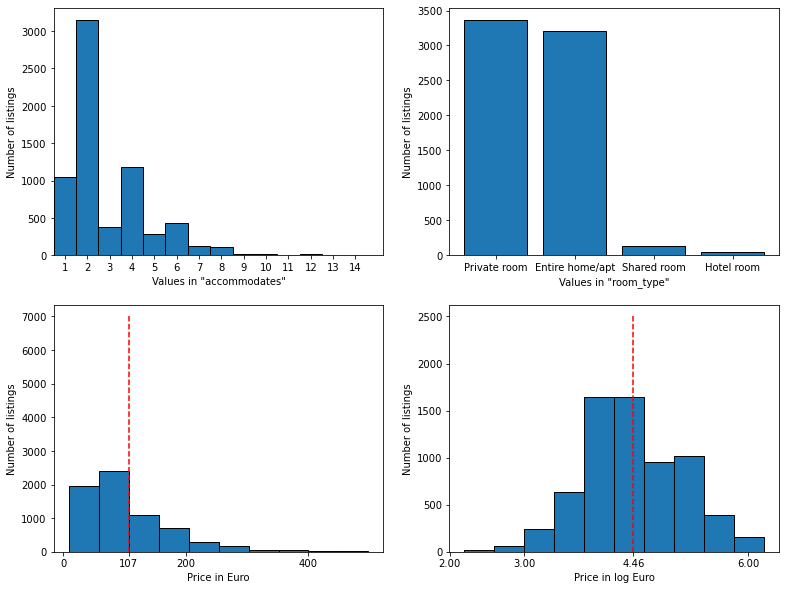

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (13,10))

ax1.hist(listings["accommodates"], bins = range(0,16), align = "left",edgecolor='black')
ax1.set_xticks(range(15))
ax1.set_xlabel("Values in \"accommodates\"")
ax1.set_xlim(0.5)
ax1.set_ylabel("Number of listings")


ax2.bar(listings["room_type"].value_counts().index.values, listings["room_type"].value_counts(), edgecolor='black')
ax2.set_xlabel("Values in \"room_type\"")
ax2.set_ylabel("Number of listings")

ax3.hist(price["price"],edgecolor='black')
ax3.set_xlabel("Price in Euro")
ax3.set_ylabel("Number of listings")
ticks = np.insert(np.arange(0.,12000.,200.),0,np.round(price["price"].mean(),2))
ax3.set_xticks(ticks)
ax3.vlines(price["price"].mean(), 0, 7000, colors = "red", linestyles = "dashed")

ax4.hist(price["log_price"],edgecolor='black')
ax4.set_xlabel("Price in log Euro")
ax4.set_ylabel("Number of listings")
ticks = np.insert(np.arange(0.,4.),0,np.round(price["log_price"].mean(),2))
ticks = np.insert(ticks, 0, np.arange(6,10))
ax4.set_xticks(ticks)
ax4.vlines(price["log_price"].mean(), 0, 2500, colors = "red", linestyles = "dashed")

plt.savefig("plots/descriptive1.png")

plt.show()

In [9]:
listings["room_type"].value_counts()

Private room       3436
Entire home/apt    3348
Shared room         138
Hotel room           54
Name: room_type, dtype: int64

In [10]:
na_df = pd.DataFrame(listings.isna().sum()[listings.isna().sum()!=0])
na_df.columns = ["NAs"]
na_df.index = na_df.index.rename("Variable")
na_df = na_df.sort_values("NAs", ascending = False)
print(na_df.to_latex())

\begin{tabular}{lr}
\toprule
{} &   NAs \\
Variable                     &       \\
\midrule
neighbourhood\_group\_cleansed &  6976 \\
calendar\_updated             &  6976 \\
license                      &  6976 \\
bathrooms                    &  6976 \\
host\_response\_rate           &  4509 \\
host\_response\_time           &  4509 \\
host\_acceptance\_rate         &  4328 \\
host\_about                   &  3466 \\
neighbourhood                &  3028 \\
neighborhood\_overview        &  3028 \\
host\_neighbourhood           &  2173 \\
review\_scores\_value          &  1582 \\
review\_scores\_location       &  1580 \\
review\_scores\_checkin        &  1580 \\
review\_scores\_accuracy       &  1574 \\
review\_scores\_communication  &  1574 \\
review\_scores\_cleanliness    &  1573 \\
review\_scores\_rating         &  1429 \\
last\_review                  &  1429 \\
first\_review                 &  1429 \\
reviews\_per\_month            &  1429 \\
beds                         &   242 \

In [23]:
listings["property_type"].value_counts()

Entire rental unit                  1592
Private room in rental unit         1392
Private room in residential home    1347
Entire residential home              927
Entire condominium (condo)           269
                                    ... 
Houseboat                              1
Hut                                    1
Shared room in casa particular         1
Igloo                                  1
Entire vacation home                   1
Name: property_type, Length: 61, dtype: int64

In [22]:
np.unique(listings["property_type"])

array(['Boat', 'Camper/RV', 'Casa particular', 'Castle', 'Dome house',
       'Entire bungalow', 'Entire cabin', 'Entire chalet',
       'Entire condominium (condo)', 'Entire cottage',
       'Entire guest suite', 'Entire guesthouse', 'Entire loft',
       'Entire place', 'Entire rental unit', 'Entire residential home',
       'Entire serviced apartment', 'Entire townhouse',
       'Entire vacation home', 'Entire villa', 'Farm stay', 'Houseboat',
       'Hut', 'Igloo', 'Private room',
       'Private room in bed and breakfast', 'Private room in bungalow',
       'Private room in cabin', 'Private room in casa particular',
       'Private room in chalet', 'Private room in condominium (condo)',
       'Private room in cottage', 'Private room in floor',
       'Private room in guest suite', 'Private room in guesthouse',
       'Private room in hostel', 'Private room in loft',
       'Private room in rental unit', 'Private room in residential home',
       'Private room in serviced apartmen

In [3]:
 price_new, listings_new, _ = load_data()

------------------------------
Loading data...
------------------------------
Data loaded.
Data cleansed.
Imputation done. No NaN's are left in the data.
Further Modifications are done.
Text Data generated.
Have fun implementing your models.


In [5]:
listings_new["count"]

0       36.0
1       38.0
2       13.0
3       23.0
4       40.0
        ... 
6835     0.0
6836     6.0
6837     0.0
6838     0.0
6839     0.0
Name: count, Length: 6840, dtype: float64

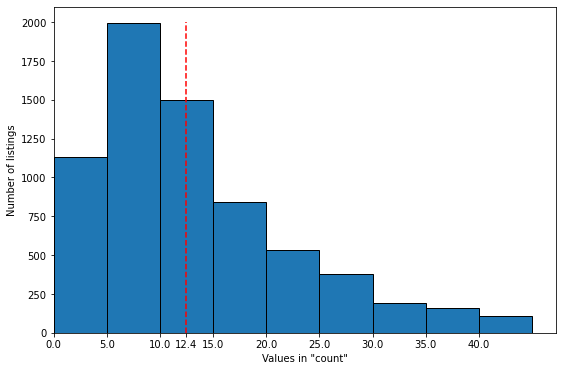

In [26]:
fig, ax1 = plt.subplots( figsize = (9,6))

ax1.hist(listings_new["count"],edgecolor='black', bins = range(0,50,5))
ax1.set_xlabel("Values in \"count\"")
ax1.set_xlim(0)
ax1.set_ylabel("Number of listings")

ticks = np.insert(np.arange(0.,45.,5.),0,np.round(listings_new["count"].mean(),2))
#ticks = np.insert(ticks, 0, np.arange(6,10))
ax1.set_xticks(ticks)
ax1.vlines(listings_new["count"].mean(), 0, 2000, colors = "red", linestyles = "dashed")

plt.savefig("plots/no_imgs.png")

plt.show()

In [27]:
listings_new["count"].max()

47.0

# MODELS
## ROOM

In [48]:
train = pd.read_csv("logs/room/final/run-train-tag-epoch_loss.csv")
train.drop("Wall time", axis = 1, inplace = True)
val =  pd.read_csv("logs/room/final/run-validation-tag-epoch_loss.csv")
val.drop("Wall time", axis = 1, inplace = True)
train["Data"] = "Training"
val["Data"] = "Validation"
df = pd.concat((train, val))
df.reset_index(drop = True, inplace = True)

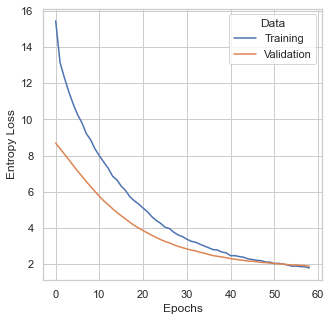

In [54]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.set_theme(style="whitegrid")
sns.lineplot(data=df, x="Step", y="Value", hue="Data", ax = ax)
ax.set_xlabel("Epochs")
ax.set_ylabel("Entropy Loss")
plt.show()

In [2]:
X_train, X_test, X_val, y_train, y_test, y_val = load_data(drop_id = False, for_dendro=True, standardize = False)


------------------------------
Fit and Transform data...
------------------------------
58 amenities have been removed due to close zero-variance.
Text, OpenStreet and image data loaded.
44 binary variables have been removed due to close zero-variance.
Imputation done. No NaN's are left in the data.
Due to insignificant t-tests we drop:
['host_is_superhost', 'Extra pillows and blankets', 'Luggage dropoff allowed', 'Free_parking', 'host_name_sounds_west', 'host_name_sounds_rare', 'neighbourhood_cleansed_Dn Laoghaire-Rathdown']
------------------------------
Transform data...
------------------------------
58 amenities have been removed due to close zero-variance.
Text, OpenStreet and image data loaded.
44 binary variables have been removed due to close zero-variance.
Imputation done. No NaN's are left in the data.
Due to insignificant t-tests we drop:
['host_is_superhost', 'Extra pillows and blankets', 'Luggage dropoff allowed', 'Free_parking', 'host_name_sounds_west', 'host_name_sounds

In [26]:
X_train_new = X_train.loc[~np.any(X_train[["no_img_others","no_img_hallway", "no_img_dining", "no_img_bathroom", "no_img_bedroom", "no_img_kitchen", "no_img_living"]].values == 0, axis = 1),:]

In [27]:
(X_train_new[["no_img_others","no_img_hallway", "no_img_dining", "no_img_bathroom", "no_img_bedroom", "no_img_kitchen", "no_img_living"]]==0).sum()

no_img_others      1188
no_img_hallway     2759
no_img_dining      2689
no_img_bathroom     768
no_img_bedroom      233
no_img_kitchen      838
no_img_living       967
dtype: int64

In [6]:
for i in ["no_img_others", "no_img_hallway", "no_img_dining", "no_img_bathroom", "no_img_bedroom", "no_img_kitchen", "no_img_living"]:
    print(X_train[i].value_counts())

0.0     1740
1.0      763
2.0      598
3.0      409
4.0      258
5.0      209
6.0      196
7.0      114
8.0       87
9.0       80
10.0      58
12.0      45
11.0      42
13.0      30
15.0      29
14.0      24
16.0      14
18.0      14
19.0      11
17.0       9
22.0       7
20.0       6
21.0       3
33.0       3
24.0       3
23.0       3
27.0       3
26.0       3
32.0       2
25.0       2
29.0       2
37.0       1
30.0       1
62.0       1
43.0       1
38.0       1
36.0       1
35.0       1
39.0       1
41.0       1
Name: no_img_others, dtype: int64
0.0     3311
1.0      934
2.0      308
3.0      116
4.0       47
5.0       31
6.0       12
11.0       5
7.0        4
8.0        3
9.0        2
12.0       1
13.0       1
10.0       1
Name: no_img_hallway, dtype: int64
0.0     3241
1.0     1029
2.0      322
3.0      108
4.0       45
5.0       18
8.0        5
7.0        5
6.0        2
10.0       1
Name: no_img_dining, dtype: int64
1.0     1343
0.0     1320
2.0     1083
3.0      571
4.0      240


In [2]:
X_train, X_test, X_val, y_train, y_test, y_val = load_data(drop_id = True)


------------------------------
Fit and Transform data...
------------------------------
58 amenities have been removed due to close zero-variance.
Text, OpenStreet and image data loaded.
44 binary variables have been removed due to close zero-variance.
Imputation done. No NaN's are left in the data.
PCA's built and correlated features dropped.
Due to insignificant t-tests we drop:
['host_is_superhost', 'Extra pillows and blankets', 'Luggage dropoff allowed', 'Free_parking', 'host_name_sounds_west', 'host_name_sounds_rare', 'neighbourhood_cleansed_Dn Laoghaire-Rathdown']
------------------------------
Transform data...
------------------------------
58 amenities have been removed due to close zero-variance.
Text, OpenStreet and image data loaded.
44 binary variables have been removed due to close zero-variance.
Imputation done. No NaN's are left in the data.
PCA's built and correlated features dropped.
Due to insignificant t-tests we drop:
['host_is_superhost', 'Extra pillows and blanke

In [5]:
print(list(X_train.columns))

['host_identity_verified', 'instant_bookable', 'Breakfast', 'Carbon_monoxide_alarm', 'Elevator', 'Fire_extinguisher', 'Private_entrance', 'Workspace', 'Shampoo_Conditioner_available', 'Dryer_available', 'TV_available', 'kiosks', 'host_since', 'latitude', 'longitude', 'number_of_reviews', 'last_review', 'review_scores_communication', 'name_length', 'prop_of_eng_reviews', 'mean_review_length', 'negativity_descr', 'negativity_neigh_over', 'negativity_host_ab', 'parking', 'brightness', 'contrast', 'city_life_pca1', 'city_life_pca2', 'city_life_pca3', 'city_life_pca4', 'city_life_pca5', 'travel_touristic_pca', 'kitchen_pca1', 'kitchen_pca2', 'kitchen_pca3', 'kitchen_pca4', 'accommodation_size_pca1', 'accommodation_size_pca2', 'accommodation_size_pca3', 'accommodation_size_pca4', 'accommodation_size_pca5', 'accommodation_size_pca6', 'host_listings_pca1', 'host_listings_pca2', 'host_listings_pca3', 'min_nights_pca', 'availability_pca', 'review_total_pca1', 'review_total_pca2', 'review_total_p

# Imputation Plots

In [ ]:
url_listing = "http://data.insideairbnb.com/ireland/leinster/dublin/2021-11-07/data/listings.csv.gz"
listings = pd.read_csv(url_listing)

In [ ]:
relevant = ["id", "name", "last_scraped", "description", "neighborhood_overview", "host_id", "host_url", "host_name", "host_since", "host_location",
                                "host_about", "host_is_superhost", "host_listings_count","host_identity_verified",
                                "neighbourhood_cleansed",
                                "latitude",
                                "longitude",
                                "property_type",
                                "room_type",
                                "accommodates",
                                "bathrooms_text",
                                "bedrooms",
                                "beds",
                                "amenities",
                                "minimum_nights",
                                "maximum_nights",
                                "has_availability",
                                "availability_30",
                                "availability_60",
                                "availability_90",
                                "availability_365",
                                "number_of_reviews",
                                "number_of_reviews_ltm", 
                                "number_of_reviews_l30d", 
                                "first_review",
                                "last_review",
                                "review_scores_rating",	 
                                "review_scores_accuracy",	
                                "review_scores_cleanliness",
                                "review_scores_checkin",
                                "review_scores_communication",
                                "review_scores_location",	
                                "review_scores_value",
                                "instant_bookable",
                                "calculated_host_listings_count",
                                "reviews_per_month",
                                "host_has_profile_pic",
                                'minimum_minimum_nights', 
                                'maximum_minimum_nights', 
                                'minimum_maximum_nights', 
                                'maximum_maximum_nights', 
                                'minimum_nights_avg_ntm', 
                                'maximum_nights_avg_ntm',
                                'calculated_host_listings_count_entire_homes', 
                                'calculated_host_listings_count_private_rooms', 
                                'calculated_host_listings_count_shared_rooms', "price"]

In [ ]:
hotels = listings["room_type"] == "Hotel room"
listings = listings[~hotels]
prop = listings["property_type"]
filter_prop = prop.str.contains("hotel", case = False)
listings = listings[~filter_prop]
filter_prop = prop.str.contains("hostel", case = False)
listings = listings[~filter_prop]
#listings = listings[relevant]
na_filter = listings["bathrooms_text"].isna()
listings = listings[~na_filter]

C:\Users\49173\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [ ]:
listings.isna().sum()[listings.isna().sum() > 0]

name                               1
description                      203
neighborhood_overview           2976
host_name                         11
host_since                        11
host_location                     32
host_about                      3390
host_response_time              4505
host_response_rate              4505
host_acceptance_rate            4323
host_is_superhost                 11
host_thumbnail_url                11
host_picture_url                  11
host_neighbourhood              2133
host_listings_count               11
host_total_listings_count         11
host_has_profile_pic              11
host_identity_verified            11
neighbourhood                   2976
neighbourhood_group_cleansed    6840
bathrooms                       6840
bedrooms                         230
beds                             240
calendar_updated                6840
first_review                    1405
last_review                     1405
review_scores_rating            1405
r

In [ ]:
import numpy as np
import pandas as pd
from load_data_old import clean
import requests
from bs4 import BeautifulSoup as bs
from urllib.parse import urljoin
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import halfnorm

In [ ]:
price, listings, reviews = clean()

Data loaded.


d:\Uni\WiSe21-22\Statistical and Deep Learning\DubAir\DubAir\load_data_old.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings["host_location_country"][fil] = str(i)
C:\Users\49173\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
d:\Uni\WiSe21-22\Statistical and Deep Learning\DubAir\DubAir\load_data_old.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings["host_location_country"][fil] = str(country_list[i])
d:\Uni\WiSe21-22\Statistical an

Data cleansed.


In [ ]:
hotel_filter = listings["room_type"] == "Hostel"
listings = listings[~hotel_filter]
price = price[~hotel_filter]

In [ ]:
listings.isna().sum()[listings.isna().sum().values > 0]

name                                1
description                       203
neighborhood_overview            2976
host_name                          11
host_since                         11
host_about                       3390
host_listings_count                11
bedrooms                          230
beds                              240
first_review                     1405
last_review                      1405
review_scores_rating             1405
review_scores_accuracy           1548
review_scores_cleanliness        1547
review_scores_communication      1548
review_scores_location           1554
review_scores_value              1556
reviews_per_month                1405
host_location_country              32
Bathtub                           121
Bed linens                        121
Breakfast                         121
Cleaning before checkout          121
Dishwasher                        121
Elevator                          121
Hair dryer                        121
Indoor firep

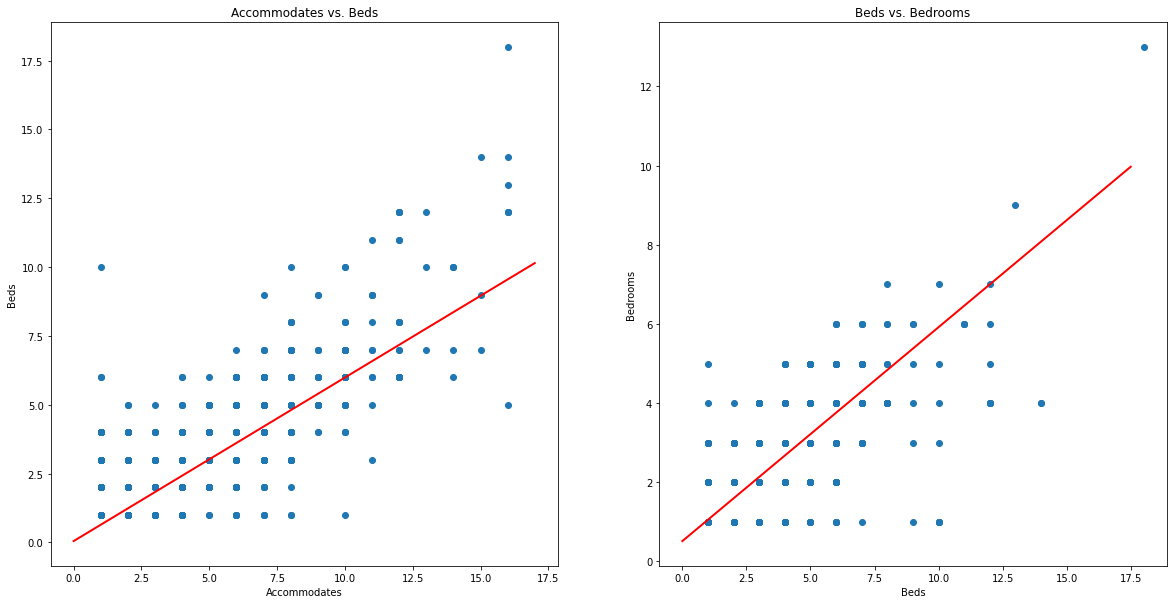

In [ ]:
a = listings["accommodates"]
b = listings["beds"]
c = listings["bedrooms"]

# So let us estimate linear models and predict, for beds
Y = b
x = a
X = pd.DataFrame([x]).transpose()
X = sm.add_constant(X) # adding a constant
# Fit model for beds
model = sm.OLS(Y, X, missing='drop').fit()
x_seq1 = [0, 17]
x_seq = sm.add_constant(x_seq)
y_seq = model.predict(x_seq)

# So now estimate linear models and predict, for beds
Y2 = c
x2 = b
X2 = pd.DataFrame([x2]).transpose()
X2 = sm.add_constant(X2) # adding a constant
# Fit model for beds
model2 = sm.OLS(Y2, X2, missing='drop').fit()
x_seq2 = [0, 17.5]
x_seq3 = sm.add_constant(x_seq2)
y_seq2 = model2.predict(x_seq3)


fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].scatter(a,b)
ax[0].set_title("Accommodates vs. Beds")
ax[0].set_xlabel("Accommodates")
ax[0].set_ylabel("Beds")
ax[0].plot(x_seq1, y_seq, color='red',linewidth=2)
ax[1].scatter(b,c)
ax[1].set_title("Beds vs. Bedrooms")
ax[1].set_xlabel("Beds")
ax[1].set_ylabel("Bedrooms")
ax[1].plot(x_seq2, y_seq2, color='red',linewidth=2)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beds   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                 1.776e+04
Date:                Sun, 13 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:07:19   Log-Likelihood:                -7254.9
No. Observations:                6734   AIC:                         1.451e+04
Df Residuals:                    6732   BIC:                         1.453e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0478      0.016      3.008      0.003       0.017       0.079
accommodates     0.5941      0.004    133.248      0.000       0.585       0.603
==============================================================================
Omnibus:                     3468.797   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72230.109
Skew:                           1.999   Prob(JB):                         0.00
Kurtosis:                      18.539   Cond. No.                         6.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               bedrooms   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                 1.296e+04
Date:                Sun, 13 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:07:35   Log-Likelihood:                -5026.4
No. Observations:                6522   AIC:                         1.006e+04
Df Residuals:                    6520   BIC:                         1.007e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5155      0.011     47.377      0.000       0.494       0.537
beds           0.5404      0.005    113.851      0.000       0.531       0.550
==============================================================================
Omnibus:                     1555.709   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32659.808
Skew:                          -0.620   Prob(JB):                         0.00
Kurtosis:                      13.893   Cond. No.                         4.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
url_listing = "http://data.insideairbnb.com/ireland/leinster/dublin/2021-11-07/data/listings.csv.gz"
listings = pd.read_csv(url_listing)

Text(0, 0.5, 'density')

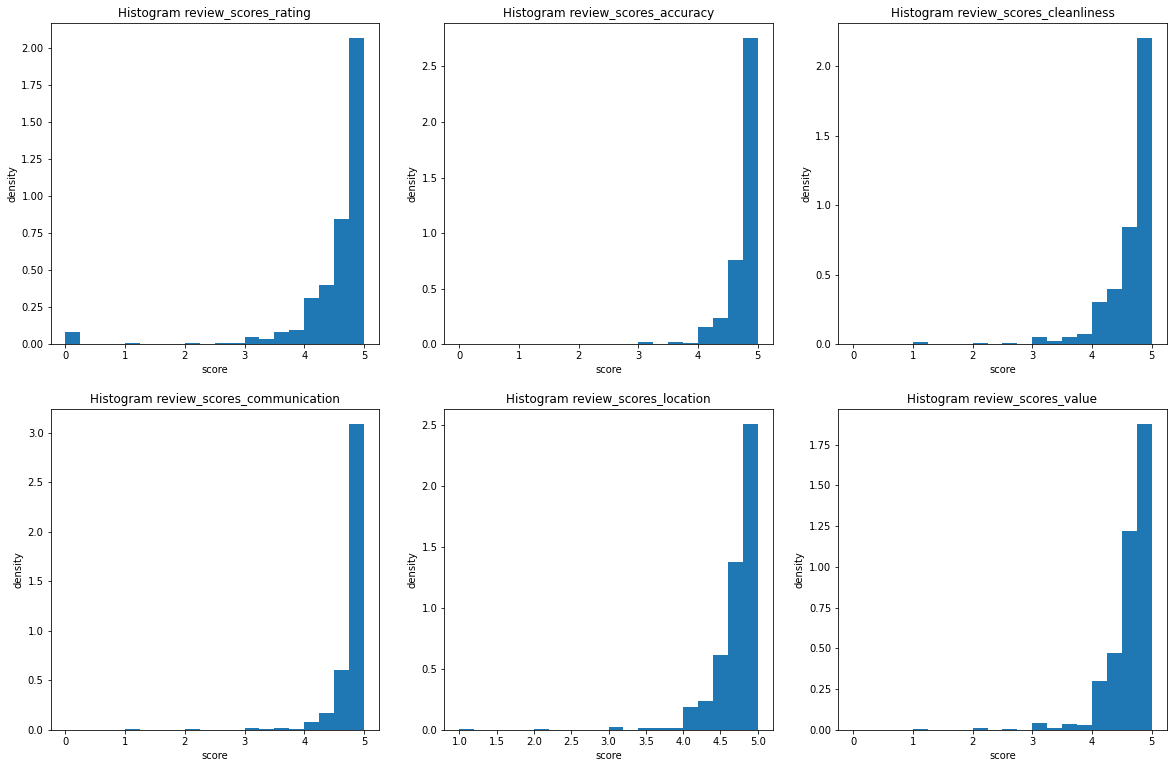

In [ ]:
# Look all like half normal
review_var = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location', 'review_scores_value']

fig, ax = plt.subplots(2,3, figsize=(20, 13))
ax[0,0].hist(listings['review_scores_rating'], density=True, bins = 20)
ax[0,0].set_title('Histogram review_scores_rating')
ax[0,0].set_xlabel("score")
ax[0,0].set_ylabel("density")
ax[0,1].hist(listings['review_scores_accuracy'], density=True, bins = 20)
ax[0,1].set_title('Histogram review_scores_accuracy')
ax[0,1].set_xlabel("score")
ax[0,1].set_ylabel("density")
ax[0,2].hist(listings['review_scores_cleanliness'], density=True, bins = 20)
ax[0,2].set_title('Histogram review_scores_cleanliness')
ax[0,2].set_xlabel("score")
ax[0,2].set_ylabel("density")
ax[1,0].hist(listings['review_scores_communication'], density=True, bins = 20)
ax[1,0].set_title('Histogram review_scores_communication')
ax[1,0].set_xlabel("score")
ax[1,0].set_ylabel("density")
ax[1,1].hist(listings['review_scores_location'], density=True, bins = 20)
ax[1,1].set_title('Histogram review_scores_location')
ax[1,1].set_xlabel("score")
ax[1,1].set_ylabel("density")
ax[1,2].hist(listings['review_scores_value'], density=True, bins = 20)
ax[1,2].set_title('Histogram review_scores_value')
ax[1,2].set_xlabel("score")
ax[1,2].set_ylabel("density")


In [ ]:
listings.isna().sum()[listings.isna().sum() > 0].sort_values()

name                               1
bathrooms_text                     6
host_has_profile_pic              11
host_total_listings_count         11
host_listings_count               11
host_picture_url                  11
host_thumbnail_url                11
host_is_superhost                 11
host_identity_verified            11
host_since                        11
host_name                         11
host_location                     32
description                      206
bedrooms                         236
beds                             242
review_scores_rating            1429
last_review                     1429
first_review                    1429
reviews_per_month               1429
review_scores_cleanliness       1573
review_scores_communication     1574
review_scores_accuracy          1574
review_scores_location          1580
review_scores_checkin           1580
review_scores_value             1582
host_neighbourhood              2173
neighborhood_overview           3028
n

# PCAs

In [ ]:
wrangler = Wrangler()
url_listing = "http://data.insideairbnb.com/ireland/leinster/dublin/2021-11-07/data/listings.csv.gz"
listings = pd.read_csv(url_listing)

# remove extreme prices
price = listings["price"]
price = price.str.replace("$","")
price = price.str.replace(",","")
price = price.astype(float)
filter = price < 500
listings = listings[filter]

X_train, y_train = wrangler.fit_listings(listings)

------------------------------
Fit listings...
------------------------------
58 amenities have been removed due to close zero-variance.
Text, OpenStreet and image data loaded.
61 binary variables have been removed due to close zero-variance.
Imputation done. No NaN's are left in the data.
Due to insignificant t-tests we drop:
['host_is_superhost', 'Extra_pillows_and_blankets', 'Luggage_dropoff_allowed', 'Free_parking', 'host_name_sounds_west', 'host_name_sounds_rare', 'host_location_country_Ireland', 'neighbourhood_cleansed_Dn_Laoghaire-Rathdown']


In [ ]:
city_life = ["nightclubs", "sex_amenities", "bicycle_rentals", "casinos", "university", "kiosks",
                 "theatres_artscentre", "library", "taxi", "fast_foods", "restaurants", "bars",
                 "cafes", "malls", "cinemas", "supermarkets", "bus_train_tram_station", "social_amenities"]
city_life_df = X_train[city_life]
pca_city = PCA().fit(city_life_df)


travel_touristic = ["neighbourhood_cleansed_Dublin_City", "in_city", "nearest_sight", "mean_dist_sight", 
                    "2nd_nearest_sight", "3rd_nearest_sight", "nearest_travel_poss", "mean_dist_travel"]
travel_touristic_df = X_train[travel_touristic]
pca_travel = PCA().fit(travel_touristic_df)


kitchen = ["Microwave", "Dishes_and_silverware", "Refridgerator_available", "Dishwasher",
           "Stoves_available", "Cooking_basics", "Oven_available", "Kitchen_available",
           "Hot_water"]
kitchen_equip_df = X_train[kitchen]
pca_kitchen = PCA().fit(kitchen_equip_df)


acco = ["room_type_Private_room", "room_type_Entire_home/apt", 
        "bath_number_1", "bath_number_2", "bath_kind_Shared", "bath_kind_Private", "bath_kind_Normal",
        "bedrooms_1", "bedrooms_2", "accommodates", "beds", 
        "property_type_Private_room_in_residential_home", "property_type_Entire_rental_unit",
        "property_type_Private_room_in_rental_unit", "property_type_Entire_residential_home"]
accommodation_size_df = X_train[acco]
pca_acco = PCA().fit(accommodation_size_df)

host_listings = ["calculated_host_listings_count", "host_listings_count", "calculated_host_listings_count_private_rooms",
                 "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_shared_rooms"]
host_listings_df = X_train[host_listings]
pca_listings = PCA().fit(host_listings_df)
r_cs = np.cumsum(pca_listings.explained_variance_ratio_)


min_nights = ["minimum_nights", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_nights_avg_ntm"]
min_nights_df = X_train[min_nights]
pca_minnights = PCA().fit(min_nights_df)


avail = ["availability_365", "availability_30", "availability_60", "availability_90"]
avail_df = X_train[avail]
pca_avail = PCA().fit(avail_df)


review_total =  ["review_scores_rating", "mean_compound", "most_pos_compound", "mean_positivity",
                 "mean_neutrality", "mean_negativity", "prop_of_neg_comp", "mean_review_length"]
review_total_df = X_train[review_total]
pca_review = PCA().fit(review_total_df)


review_scores = ["review_scores_location", "review_scores_accuracy", "review_scores_communication", "review_scores_cleanliness",
                 "review_scores_value"]
review_scores_df = X_train[review_scores]
pca_rescores = PCA().fit(review_scores_df)


max_nights = ["maximum_nights", "minimum_maximum_nights", "maximum_maximum_nights", 
              "maximum_nights_avg_ntm", "Long_term_stays_allowed"]
max_nights_df = X_train[max_nights]
pca_maxnights = PCA().fit(max_nights_df)


review_amount = ["number_of_reviews_l30d", "number_of_reviews_ltm", "reviews_per_month"]
review_amount_df = X_train[review_amount]
pca_rev_amount = PCA().fit(review_amount_df)

host_ab = ["compound_host_ab", "positivity_host_ab", "host_about_length", "neutrality_host_ab"]
host_ab_df = X_train[host_ab]
pca_host_ab = PCA().fit(host_ab_df)

neigh_over = ["compound_neigh_over", "positivity_neigh_over", "neighborhood_overview_length", "neutrality_neigh_over"]
neigh_over_df = X_train[neigh_over]
pca_neigh_over = PCA().fit(neigh_over_df)

descr = ["compound_descr", "positivity_descr", "description_length", "neutrality_descr"]
descr_df = X_train[descr]
pca_descr = PCA().fit(neigh_over_df)

img_no = ["no_img_others", "no_img_hallway", "no_img_dining", "no_img_bathroom", "count", 
          "no_img_bedroom", "no_img_kitchen", "no_img_living"]
img_no_df = X_train[img_no]
pca_image = PCA().fit(img_no_df)

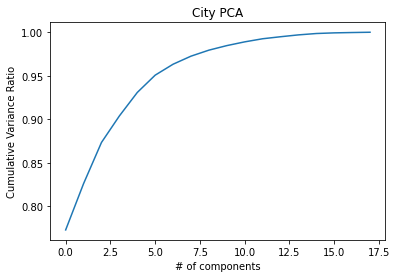

In [ ]:
plt.plot(np.cumsum(pca_city.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("City PCA")
plt.savefig("pcas/city_pca.png")

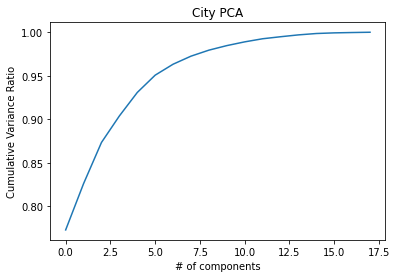

In [ ]:
plt.plot(np.cumsum(pca_city.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("City PCA")
plt.savefig("pcas/city_pca.png")

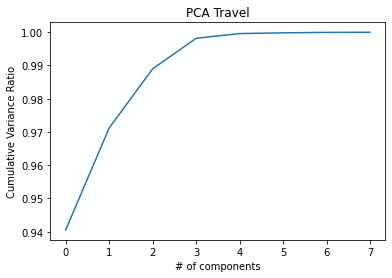

In [ ]:
plt.plot(np.cumsum(pca_travel.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("PCA Travel")
plt.savefig("pcas/travel_pca.png")

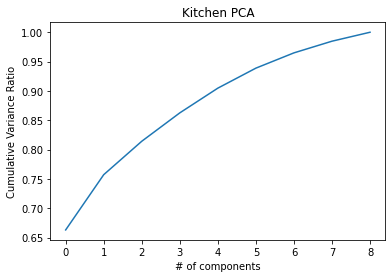

In [ ]:
plt.plot(np.cumsum(pca_kitchen.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Kitchen PCA")
plt.savefig("pcas/kitchen_pca.png")

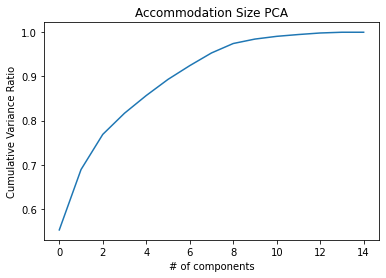

In [ ]:
plt.plot(np.cumsum(pca_acco.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Accommodation Size PCA")
plt.savefig("pcas/accommodation_size_pca.png")

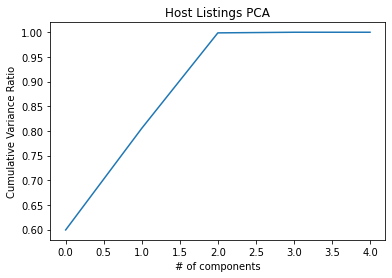

In [ ]:
plt.plot(r_cs)
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Host Listings PCA")
plt.savefig("pcas/host_listings_pca.png")

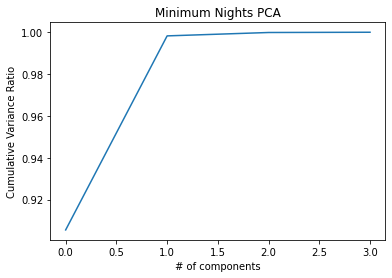

In [ ]:
plt.plot(np.cumsum(pca_minnights.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Minimum Nights PCA")
plt.savefig("pcas/min_nights_pca.png")

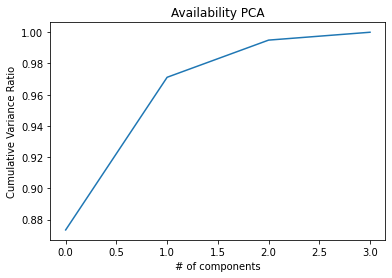

In [ ]:
plt.plot(np.cumsum(pca_avail.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Availability PCA")
plt.savefig("pcas/avail_pca.png")

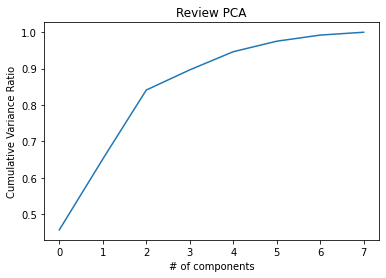

In [ ]:
plt.plot(np.cumsum(pca_review.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Review PCA")
plt.savefig("pcas/review_pca.png")

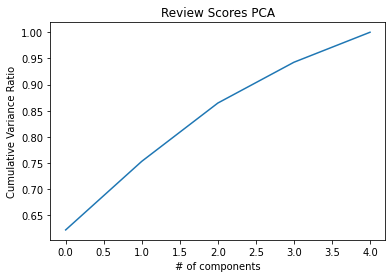

In [ ]:
plt.plot(np.cumsum(pca_rescores.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Review Scores PCA")
plt.savefig("pcas/review_scores_pca.png")

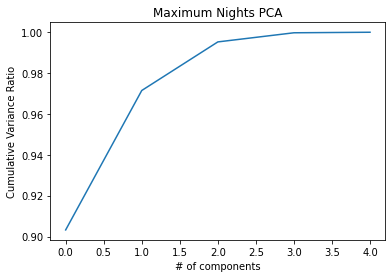

In [ ]:
plt.plot(np.cumsum(pca_maxnights.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Maximum Nights PCA")
plt.savefig("pcas/max_nights_pca.png")

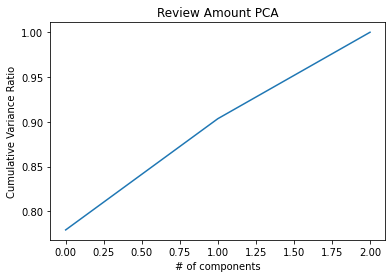

In [ ]:
plt.plot(np.cumsum(pca_rev_amount.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Review Amount PCA")
plt.savefig("pcas/review_amount_pca")

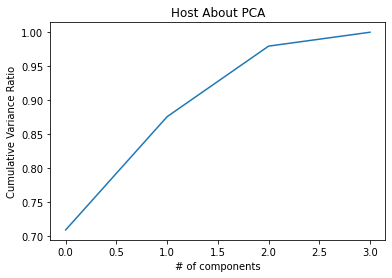

In [ ]:
plt.plot(np.cumsum(pca_host_ab.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Host About PCA")
plt.savefig("pcas/host_ab_pca.png")

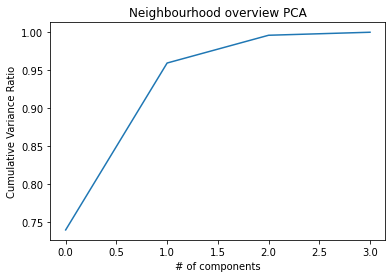

In [ ]:
plt.plot(np.cumsum(pca_neigh_over.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Neighbourhood overview PCA")
plt.savefig("pcas/neigh_over_pca.png")

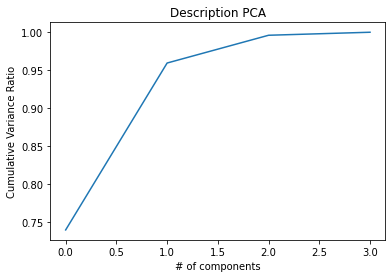

In [ ]:
plt.plot(np.cumsum(pca_descr.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Description PCA")
plt.savefig("pcas/descr_pca.png")

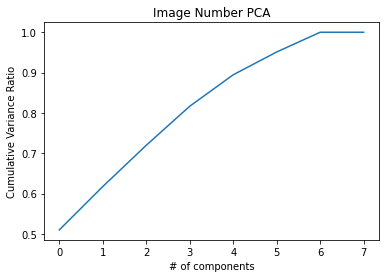

In [ ]:
plt.plot(np.cumsum(pca_image.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Image Number PCA")
plt.savefig("pcas/image_pca.png")

In [ ]:
import os

In [ ]:
os.getcwd()

'd:\\Uni\\WiSe21-22\\Statistical and Deep Learning\\DubAir\\DubAir'